# Saudi Arabia Used Car Price Prediction

predicting the selling price of used cars on the https://syarah.com/ website

![Gambar Syarah](https://i0.wp.com/www.menabytes.com/wp-content/uploads/2018/05/Syarah-Series-A.jpg?fit=1000%2C500&ssl=1&resize=1280%2C720)



# Context 
---

Based on article titled  [Saudi Arabia's Used Cars Sales Market is Poised to Take Off](https://www.consultancy-me.com/news/5464/saudi-arabias-used-cars-sales-market-is-poised-to-take-off), due to financial constraints and the current pandemic scenario, many buyers are postponing the purchase of new cars and are looking to buy high-quality used cars at a reasonable price. The used car market is likely to expand in the next five years as online players provide good value for money. Saudis generally replace their cars every 2-4 years, while expatriates change their cars after 4 years on average. However, this trend is likely to change as younger Saudis enter the workforce and women are allowed to drive. The average age of most second-hand sales is likely to move towards 5-6 years. 


Syarah, being an online marketplace for selling cars in Saudi Arabia, plays a crucial role in the expanding used car market. With the growing trend of buyers opting for high-quality used cars and the changing dynamics of car ownership in the country, Syarah's platform serves as a convenient and efficient solution for sellers and buyers. However, to ensure the success of the platform, it is important for sellers to accurately determine the pricing of their cars. This will not only attract potential buyers but also maintain Syarah's performance by sustaining visitor and buyer numbers, ultimately leading to increased profitability for the company.


# Problem
---

 Determining the right selling price for a car based on its specifications is challenging for sellers on the Syarah platform. Sellers may struggle to set competitive prices, leading to potential lack of interest from buyers if the price is too high or disproportionate profit if the price is too low. This can result in decreased transactions and negatively impact Syarah's revenue. __How does syarah.com determine the right car selling price based on existing specifications from previous sales data?__



# Goals
---
Based on the problem, **Syarah.com needs to introduce an innovative tool that can accurately predict car prices**. This tool will provide guidance to sellers in determining competitive selling prices that reflect the true value of their cars. Additionally, it will assist buyers in making informed decisions by ensuring they obtain fair purchase prices aligned with market value. By achieving these goals, Syarah.com aims to create transparency and fairness in car transactions for both sellers and buyers, while generating sustainable profits for Syarah.com as an online marketplace platform for cars.

# Approach
---
__Syarah.com can develop a Machine learning Model to assist sellers in determining the appropriate selling price for their cars based on their previous sales data__. Machine learning techniques can be applied to perform regression analysis and build predictive models that capture the distinguishing characteristics of car prices. These models can learn patterns and relationships from historical data, such as car specifications, market conditions, location, and other relevant features, to predict the price of a car based on its attributes.

By leveraging machine learning for regression analysis, Syarah.com can develop models that assist sellers in determining the appropriate prices for their cars based on various factors to be implemented on their website, Syarah.com. This can enhance the accuracy of pricing decisions and facilitate fair market value for the cars listed on the platform.



# Metric Evaluation
---
In evaluating the accuracy of the model, we will utilize three metrics: RMSE, MAE, and MAPE. These metrics provide valuable insights into the performance of the regression model:

- RMSE (Root Mean Squared Error) calculates the average square root of the errors, providing a measure of the overall deviation between predicted and actual values.

- MAE (Mean Absolute Error) computes the average absolute difference between predicted and actual values, offering a straightforward measure of the model's accuracy.

- MAPE (Mean Absolute Percentage Error) calculates the average percentage difference between predicted and actual values, allowing us to assess the relative magnitude of errors.

By examining the values of RMSE, MAE, and MAPE, we can gauge the accuracy of the model in predicting rental prices, taking into account the limitations of the utilized features. Lower values of these metrics indicate a higher level of accuracy in price prediction.

# Data Understanding
---
- The dataset consists of https://syarah.com/ listings in Saudi Arabia in the year 2021.
- Each row of data represents information regarding the specifications of a car and its price.

### Attribute Information

| Attribute    | Data Type, Length | Description                                                      |
|--------------|------------------|------------------------------------------------------------------|
| Type         | Object           | Brand Name of Car                                                |
| Region       | Object             | The region in which the used car was offered for sale             |
| Make         | Object             | Name of the car company                                          |
| Gear_Type    | Object             | Automatic / Manual                                               |
| Origin       | Object             | Country of importer (Gulf / Saudi / Other)                        |
| Options      | Object             | Full Options / Semi-Full / Standard                               |
| Year         | Int              | Year of Manufacturing                                            |
| Engine_Size  | Float            | The engine size of the used car                                   |
| Mileage      | Int              | The average distance that a vehicle can travel on (in km)         |
| Negotiable   | Bool             | If True, the price is 0. This means the price is negotiable (not set) |
| Price        | Int              | Price of the used car (in SAR)                                    |


# Load Libraries
---

In [1]:
# Load Library

# Data Manipulation
import pandas as pd
import numpy as np

# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import OrdinalEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#pd.set_option('display.max_colwidth', 2000)
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
---

In [2]:
df = pd.read_csv('data_saudi_used_cars.csv')
display(df.head())

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


## Exploratory Data Analysis
---

Exploratory Data Analysis (EDA) is the process of examining and summarizing the key characteristics of a dataset to gain insights and understanding. Its objective is to explore the data, detect patterns, trends, and anomalies, and generate hypotheses that can be further tested using statistical and machine learning techniques.

Some tasks involved in EDA include visualizing the distribution of the target variable (price) and the input features (such as engine size, mileage, year, brand, etc.) to uncover trends and patterns. Analyzing the correlation between the input features and the target variable to identify the most influential factors affecting the price of a used car. Handling missing values, outliers, and other data quality issues that can impact the accuracy of the machine learning model. Analyzing the distribution of categorical variables, such as make, gear type, and origin, to uncover trends and potential biases.

### **Distribution of Car Price**

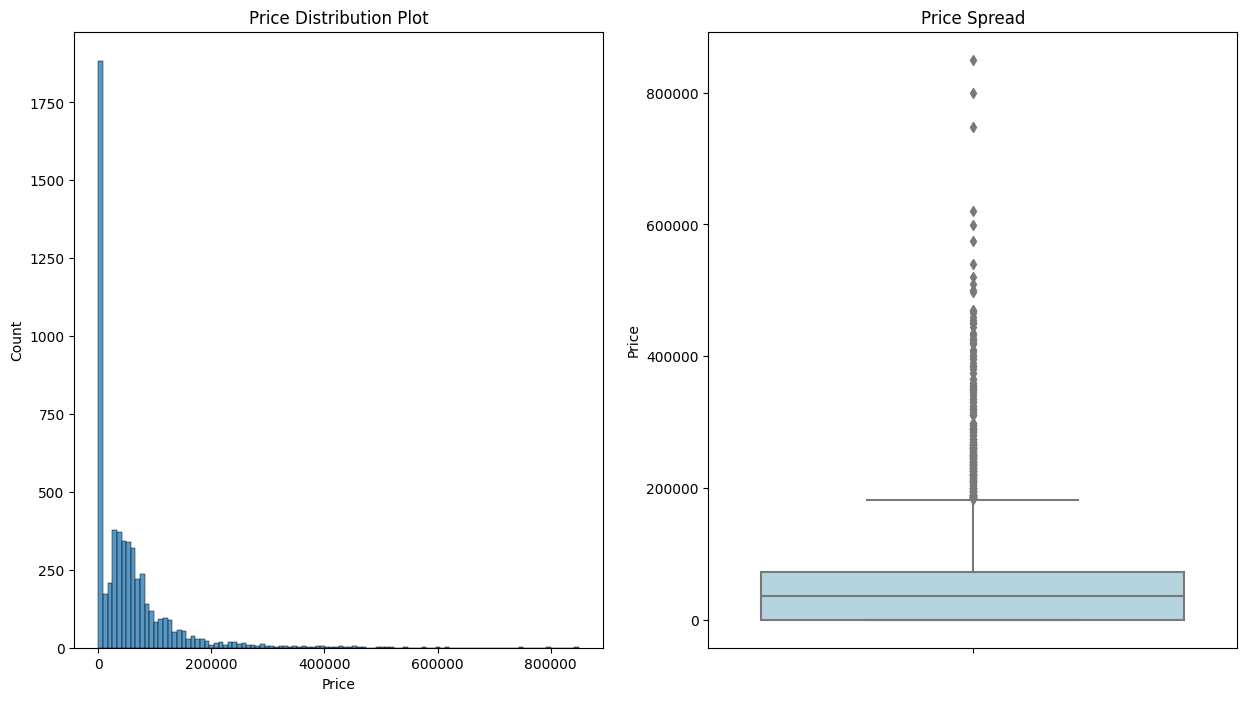

In [3]:
# Visualizing Price

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title('Price Distribution Plot')
sns.histplot(df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1, 2, 2)
plt.title('Price Spread')
sns.boxplot(y=df['Price'], color='lightblue')  # Set color to light blue
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()


Because we have found the 0 value, there will be needed to treat the 0 value.

The Price variable in the dataset is heavily skewed to the right, with a significant portion of the data concentrated at the value of 0. The reason for the Price being 0 is because sellers indicate that the cars they are selling are "Negotiable" In such cases, sellers may choose to advertise the price as 0 to indicate that the price is flexible and open to negotiation with potential buyers. This means that the actual selling price will be determined through a negotiation process between the seller and the buyer. During the Data Understanding process, it was observed that approximately 25% of the values in the Price column are 0. Since the objective of the Regression Analysis is to predict the selling price of a car based on defined prices, regardless of whether the price is negotiable or not, it is necessary to focus on data where the seller has explicitly provided a non-zero price for the car. Therefore, these cases where the car is "Negotiable" or Price is 0 should be excluded from the analysis if the objective is to predict the specific selling price of a car.

In [4]:
# total car is "Negotiable" or Price is 0 
len(df[df['Price']==0]), len(df[df['Negotiable']==True])

(1797, 1796)

There are 1796 data points where the cars have 'Price' = 0 due to having 'Negotiable' = True status. However, there is a discrepancy in the number of cars between 'Price' = 0 and 'Negotiable' = True. This difference needs to be investigated.

In [5]:
# free car
df_check = df[(df['Price'] == 0) & (df['Negotiable'] == False)]
df_check

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0


After further investigation, it appears that there are data points where the cars have 'Price' = 0 and 'Negotiable' = False status. This means that the cars are listed for sale without any possibility of negotiation, with a price of 0. In other words, they are being offered for free. This seems highly unlikely and requires attention.

In [6]:
# drop free Car
df = df.drop(df[(df['Price'] == 0) & (df['Negotiable'] == False)].index)

In [7]:
# Drop records with Price is 0

df = df[df['Price'] != 0]

In [8]:
# total current data
df.shape

(3827, 11)

### **Price Correlation to its Feature**

<Axes: >

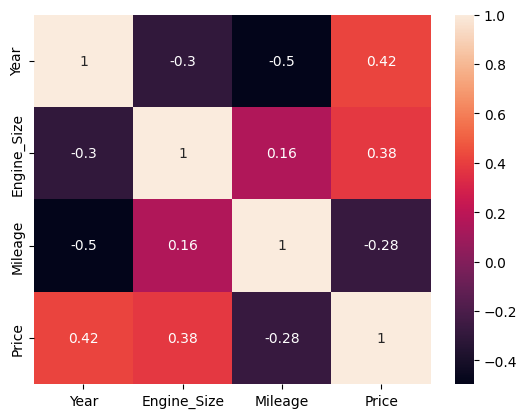

In [9]:
df_matrix=df.drop(columns=['Type','Region','Make','Gear_Type','Origin','Negotiable','Options']) 
corr_matrix = df_matrix.corr('spearman')
sns.heatmap(corr_matrix, annot= True)

Year and Engine_size may have a multicolinearity but we still need the features.

from this correlation heatmap, we can see that:

Corr Feature to Target =  Sorted from highest to lowest correlation, the variables with the highest correlation are 'Year' followed by 'Engine_Size', and then 'Mileage'.

### **Finding the Top 10 Companies of Used Cars & Top 10 Types of Used Cars**

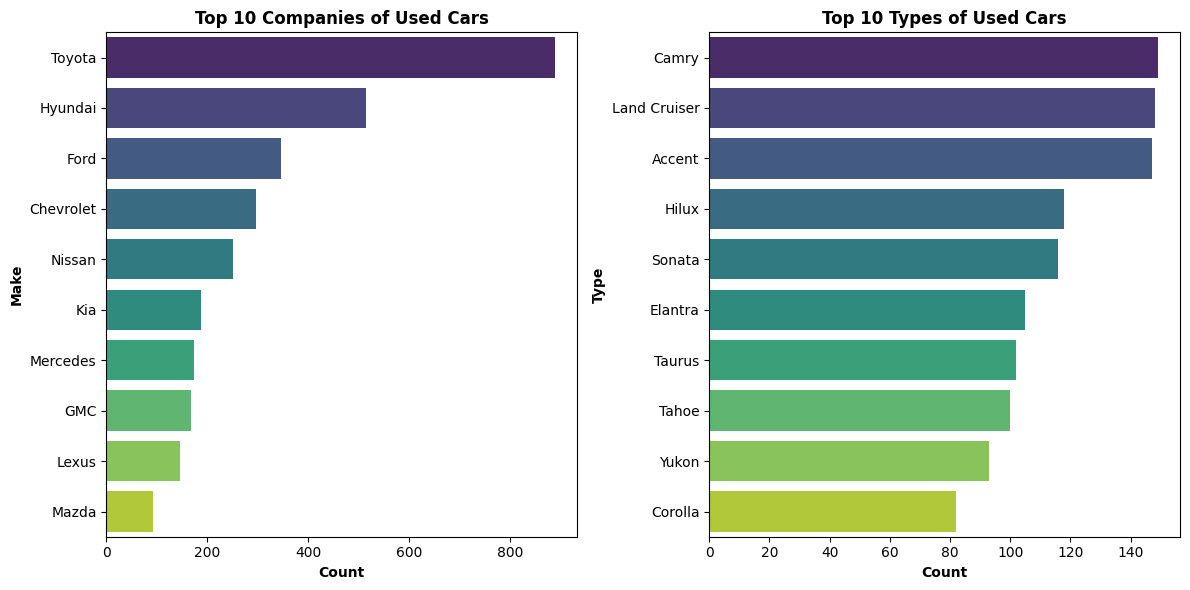

In [10]:
# Create a subplot with two countplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the top 10 companies of used cars
sns.countplot(y="Make", data=df, order=df["Make"].value_counts().iloc[:10].index, ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Companies of Used Cars", fontweight='bold')
axes[0].set_xlabel("Count", fontweight='bold')
axes[0].set_ylabel("Make", fontweight='bold')

# Plot the top 10 types of used cars
sns.countplot(y="Type", data=df, order=df["Type"].value_counts().iloc[:10].index, ax=axes[1], palette="viridis")
axes[1].set_title("Top 10 Types of Used Cars", fontweight='bold')
axes[1].set_xlabel("Count", fontweight='bold')
axes[1].set_ylabel("Type", fontweight='bold')

# Adjust the layout of the subplot and show the plot
fig.tight_layout()
plt.show()


In [11]:
# Cek jumlah properti berdasarkan neighbourhood group dan tipenya
print(f"Top 10 Companies of Used Cars:\n{df['Make'].value_counts().head(10)}")
print(f"\nTop 10 Types of Used Cars:\n{df['Type'].value_counts().head(10)}")

Top 10 Companies of Used Cars:
Make
Toyota       889
Hyundai      514
Ford         346
Chevrolet    296
Nissan       252
Kia          187
Mercedes     173
GMC          167
Lexus        146
Mazda         92
Name: count, dtype: int64

Top 10 Types of Used Cars:
Type
Camry           149
Land Cruiser    148
Accent          147
Hilux           118
Sonata          116
Elantra         105
Taurus          102
Tahoe           100
Yukon            93
Corolla          82
Name: count, dtype: int64


From this analysis, we can observe the popularity of certain car companies and types in the used car market. Toyota seems to be the most prevalent company, and the Camry is the most common type of used car. This information can be useful for buyers and sellers in understanding market trends and preferences.

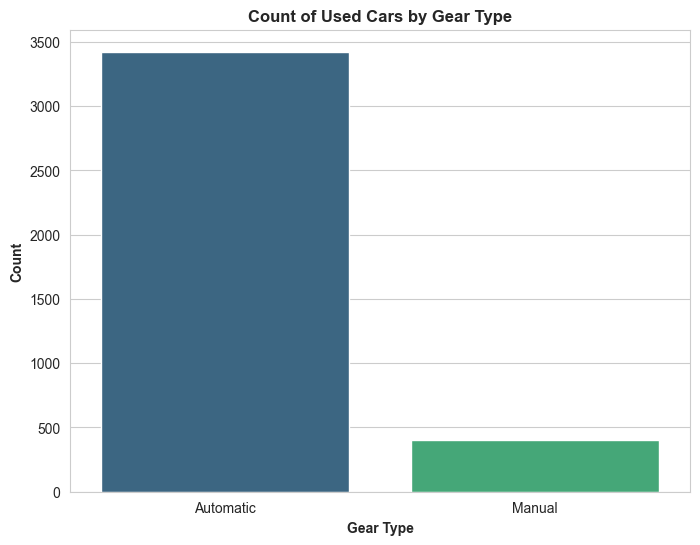

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gear_Type', data=df, palette='viridis')
ax.set_title('Count of Used Cars by Gear Type', fontweight='bold')
ax.set_xlabel('Gear Type', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
plt.show()


Based on the countplot above, it can be observed that the majority of used cars in Saudi Arabia have an automatic gear type.

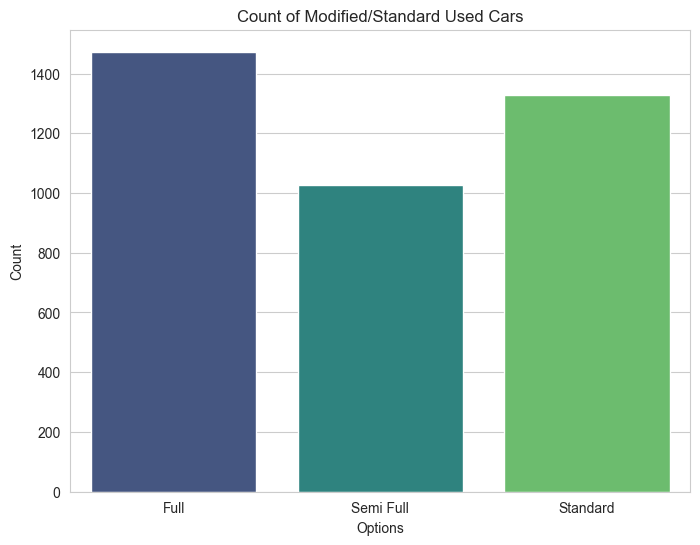

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Options', data=df, palette='viridis')
ax.set_title('Count of Modified/Standard Used Cars')
ax.set_xlabel('Options')
ax.set_ylabel('Count')
plt.show()

The option feature tells us about the accesories of the cars such :
- Full Options
Equipped with premium features such as a sunroof, navigation system, rearview camera, high-quality audio system, leather seats, and much more.
- Semi-Full
Has some additional features like a sunroof, navigation system, rearview camera, and upgraded audio system, but it doesn't have luxury options like leather seats or rear entertainment system.

- Standard
A standard variant without significant additional features. It may have basic features like air conditioning, standard audio system, and power windows.

we can see from the countplot above semifull is the least popular.

### Check Unique value

Check unique value has function is used to generate a dataset description that includes information about each feature. This description includes the column name, data type, number of null values, percentage of null values, number of unique values, and sample unique values for each column. By using this function, we can gain a better understanding of the dataset's characteristics, including examining data diversity, identifying null values, and understanding the available data types. This information can be helpful for further analysis and processing of the dataset.

In [14]:
# Dataset Info

listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,320,"[Yukon, Range Rover, Optima, CX3, Cayenne S, S..."
1,Region,object,0,0.0,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam,..."
2,Make,object,0,0.0,56,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai..."
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Full, Semi Full, Standard]"
6,Year,int64,0,0.0,41,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 200..."
7,Engine_Size,float64,0,0.0,65,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, ..."
8,Mileage,int64,0,0.0,1346,"[80000, 140000, 220000, 25000, 189000, 155, 11..."
9,Negotiable,bool,0,0.0,1,[False]


In [15]:
# Summary Statistics

print("Describe Numerical Features")
display(df.drop(columns='Year').describe().astype('int64'))
print("Describe Categorical Features Values")
display(df.describe(include=object))
print("Describe Date Feature")
min_year = df['Year'].min()
max_year = df['Year'].max()
year_mode = df['Year'].mode().values[0]
date_info = {
'Mode Year': [year_mode],
'Minimum Year': [min_year],
'Maximum Year': [max_year]
}

df_output = pd.DataFrame(date_info)
df_output

Describe Numerical Features


,Engine_Size,Mileage,Price
count,3827,3827,3827
mean,3,142620,77995
std,1,378258,72726
min,1,100,1
25%,2,48000,35000
50%,2,103000,58000
75%,4,183000,94000
max,9,20000000,850000


Describe Categorical Features Values


,Type,Region,Make,Gear_Type,Origin,Options
count,3827,3827,3827,3827,3827,3827
unique,320,27,56,2,4,3
top,Camry,Riyadh,Toyota,Automatic,Saudi,Full
freq,149,1616,889,3423,2896,1473


Describe Date Feature


,Mode Year,Minimum Year,Maximum Year
0,2016,1963,2021


After analyzing the data, the following observations can be made:

- There are no missing values in the dataset.
- The highest recorded selling price for a car is 850,000 Riyal.
- Approximately 25% of the data has a selling price of 0 Riyal, which is indicated by the "Negotiable" variable being set to True.
- The highest recorded mileage is 20,000,000 kilometers, which seems unlikely.
- The cars in the dataset range from manufacturing years 1963 to 2022.
- Numerical variables: Year, Engine_Size, Mileage, and Price.
- Categorical variables: Type, Region, Make, Gear_Type, Origin, Options, and Negotiable.
- The dataset is mainly composed of categorical variables.

# Data Preprocessing
---

In this phase, we will conduct data cleansing, which involves preparing the data for subsequent analysis. Various tasks are involved in this process, including eliminating irrelevant features that have no impact on the problem at hand. We will also address missing values by either removing the irrelevant features or filling in the gaps with the most appropriate values based on the context. To facilitate data preprocessing and feature engineering, we will utilize a duplicated dataframe derived from the original dataset. This will allow us to refine the data and enhance its suitability for further analysis.

### Check Missing Data

<Axes: >

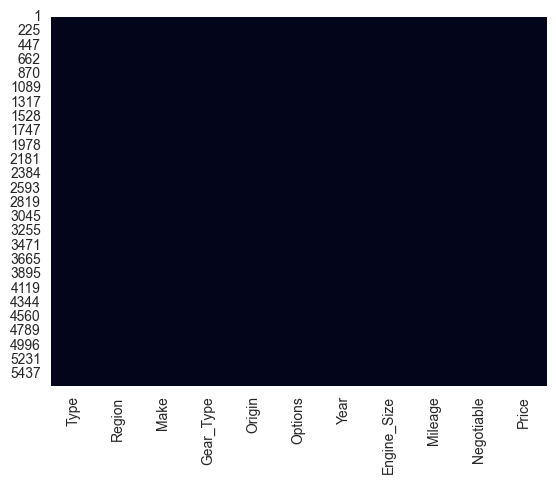

In [16]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False)

In [17]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

From the above check, no missing values were found in each attribute.

### Check Duplicate

In [18]:
df.duplicated().sum()

3

We found 3 duplicate data, it will be deleted so that there is no repetitive data.

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

### Outliers

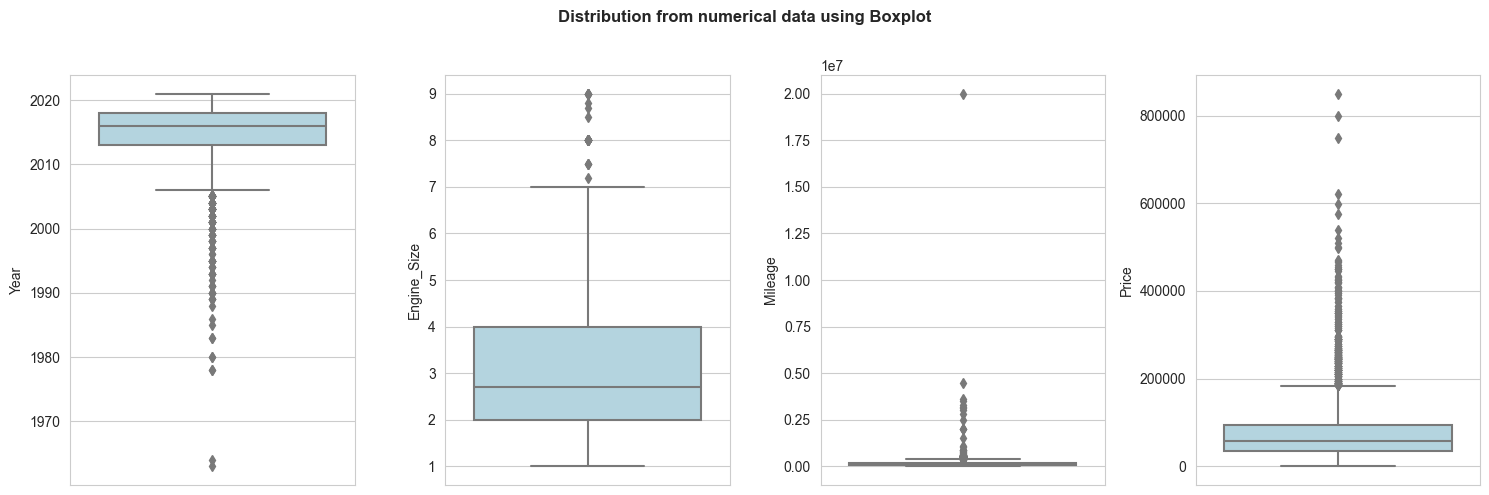

In [21]:
features = df.describe().columns
plt.figure(figsize=(15, 5))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightblue', orient='v')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  

plt.suptitle('Distribution from numerical data using Boxplot', fontweight='bold', ha='center')
plt.show()


In [22]:
pd.set_option('display.max_rows', None)  # To display all rows
sorted_df = df[['Type', 'Make','Year', 'Mileage']].sort_values(by='Year', ascending=True)
sorted_df.head(5)

,Type,Make,Year,Mileage
5012,Other,Ford,1963,300
2262,Impala,Chevrolet,1964,100000
3238,Patrol,Nissan,1978,30000
3082,Land Cruiser 70,Toyota,1978,400000
4259,S,Mercedes,1980,160000


In [23]:
sorted_df = df[['Type', 'Make','Year', 'Mileage']].sort_values(by='Mileage', ascending=False)
sorted_df.head()


,Type,Make,Year,Mileage
3403,Optra,Chevrolet,2009,20000000
572,Camry,Toyota,1998,4500000
4193,Innova,Toyota,2013,3640000
1412,Trailblazer,Chevrolet,2004,3500000
4548,Tahoe,Chevrolet,2008,3300000


An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

- In the year column, we can see there are outliers where some cars are manufactured under 1970. Some outliers needs no treatment because it can give us information. one of the outliers is Impala Chevrolet. It is a classic car that can be sold again. I will not treat this outliers because it gives us information.
- I will not treat Engine_size because the size of the engine itself is a policy set by each manufacturer.
- Based on the provided data, it appears that the Chevrolet Optra has an extremely high mileage of 20,000,000. This value seems unrealistic and could be an outlier or a data entry error. Therefore, it might be necessary to drop the row with the Chevrolet Optra to ensure the accuracy and reliability of the dataset. On the other hand, the Camry, Innova, Trailblazer, and Tahoe have relatively lower mileage values compared to the Optra, suggesting that their mileage is within a reasonable range. Hence, there may not be a need to drop these rows based on mileage considerations.
- In the target variable, Price, there are numerous outliers. Therefore, checking validation will be required based on official websites or similar platforms.

#### Handling Mileage Outlier

In [24]:
df=df[df['Mileage']<5000000]

#### Price Validation 

In [25]:
sorted_df = df[['Type', 'Make','Year','Price']].sort_values(by='Price', ascending=False)
sorted_df.head(10)

,Type,Make,Year,Price
3513,Bentayga,Bentley,2019,850000
4684,G,Mercedes,2019,800000
4273,S,Mercedes,2021,748000
2120,Ghost,Rolls-Royce,2016,620000
4653,Range Rover,Land Rover,2019,599000
3561,Range Rover,Land Rover,2020,575000
3105,Range Rover,Land Rover,2020,540000
2862,Range Rover,Land Rover,2019,520000
2504,Range Rover,Land Rover,2020,510000
3041,Camargue,Rolls-Royce,1990,500000



**For Min Price**

In [26]:
sorted_df = df[['Type', 'Make','Year','Price']].sort_values(by='Price', ascending=True)
sorted_df.head()

,Type,Make,Year,Price
3131,Yukon,GMC,2019,1
3992,G80,Genesis,2018,500
4399,Yaris,Toyota,2018,850
5128,Rio,Kia,2019,884
3474,Yaris,Toyota,2019,950


From the above dataframe, it can be observed that there are data points that need to be cross-checked with websites due to extreme values, such as very low-priced cars.

In [27]:
df.shape

(3823, 11)

In [28]:
percentage = (len(df[df['Price'] < 29000]) / df.shape[0]) * 100
percentage

17.13314151190165

Based on the official website syarah.com, the minimum selling price for a car is 29,000 rials, and there are 17.13% of car data with prices below 29,000 rials. Due to the large number of data points below the minimum price threshold, it is not feasible to drop these data points. This could potentially affect the results of the machine learning model. Therefore, we decided to gather data from [yallamotor.com](https://ksa.yallamotor.com/used-cars/pr_1000_more?sort=price_asc) and [hatla2ee.com](https://ksa.hatla2ee.com/en/car/used-prices)  to find a reasonable minimum price for cars being sold in Saudi Arabia.

In [29]:
len(df[df['Price'] < 4000])


63

Based on the research from the two previous websites, it was found that 4,000 is the minimum price for a car.

In [30]:
percentage = (len(df[df['Price'] < 4000]) / df.shape[0]) * 100
percentage

1.6479204812974106

It is only 1.65% of the total data, so dropping this amount of data will not have a significant impact on the machine learning process.

**Drop Data Price > 4000**

In [31]:
df = df[df['Price'] > 4000]


**For Max Price**

In the given dataset, there are some entries that may be considered as outliers based on the very high prices of the cars. However, in the context of car prices, the presence of high values does not necessarily indicate outliers. Based on [syarah.com](https://syarah.com/cars/%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D8%A7%D9%88%D9%86%D9%84%D8%A7%D9%8A%D9%86?sort=-price&has_discount=0), Cars from certain brands and models, such as Bentley, Rolls-Royce, and Mercedes, often have significantly higher prices compared to other brands and models. Therefore, there is no need to drop these outlier data points as the high values are still reasonable in the context of expensive cars. Moreover, these outlier data points can provide valuable insights into market trends or specific market segments within the dataset. It is important to conduct careful analysis and consider the overall domain context before removing outlier data.

### Drop Columns

The 'Negotiable' column is a column that previously had an impact on the price, where when 'Negotiable' is True, the price of a data entry becomes 0. Since a price of 0 renders the data unusable for ML modeling purposes, it is necessary to drop such rows.

In [32]:
df = df.drop(columns='Negotiable')

## Clean Dataset

In [33]:
# Cek dataset yang sudah bersih
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3757 non-null   object 
 1   Region       3757 non-null   object 
 2   Make         3757 non-null   object 
 3   Gear_Type    3757 non-null   object 
 4   Origin       3757 non-null   object 
 5   Options      3757 non-null   object 
 6   Year         3757 non-null   int64  
 7   Engine_Size  3757 non-null   float64
 8   Mileage      3757 non-null   int64  
 9   Price        3757 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 322.9+ KB


# Modeling
---

In this section, modeling will be performed to find the best score metrics that can provide benefits for stakeholders. Various treatment combinations will be tested to obtain the best model with evaluations for each treatment. The metrics used to measure the goodness of a model will also be analyzed and selected based on their relevance to the business conditions, ensuring the best and most effective results are obtained.

### Split Train Test

In [35]:
# define X y
X = df.drop(columns=['Price'])
y = df['Price'] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

The data will be split into an 75:25 ratio in modeling because it allows the use of the majority of data for training the model and ensures adequate representation. By setting aside 5% of the data for testing, we can assess how well the model predicts unseen data, while the remaining 75% provides enough data to train the model effectively.

### Transformer of Encoding & Scaling

Features will undergo encoding and scaling processes based on their types and characteristics. In this dataset, all numerical features will be scaled using StandardScaler, and all categorical features will be encoded using OneHotEncoder.

- RobustScaler: 'Year', 'Mileage'

RobustScaler is chosen as the scaling method for the 'Year' and 'Mileage' features. RobustScaler is particularly useful when dealing with numerical features that contain outliers or are not normally distributed. It utilizes robust statistics that are less affected by extreme values. By subtracting the median and dividing by the interquartile range, RobustScaler scales the features in a way that is less influenced by outliers, ensuring a more reliable and accurate transformation.

- OrdinalScaler: 'Options'

OrdinalScaler is selected for the 'Options' feature, which is an ordinal categorical feature. Ordinal features have a specific order or ranking associated with them. OrdinalScaler maps these ordinal values to numerical representations while preserving their ordinal relationship. This transformation allows machine learning algorithms to capture the relative importance and relationships between different categories, enhancing the model's performance in understanding the inherent order of the data and making more informed predictions.

- OneHotEncoder: 'Origin', 'Gear_Type', 'Options'

OneHotEncoder is used for the 'Origin', 'Gear_Type', and 'Options' features. OneHotEncoder is suitable for categorical features with a small number of unique values and no inherent order. It creates binary columns for each unique value, indicating the presence or absence of that value in the original feature. This encoding scheme allows machine learning models to effectively interpret and utilize categorical data, capturing the distinct categories without imposing any numerical order.

In [37]:
# Define the ordinal mapping
ordinal_mapping = [{'col': 'Options', 'mapping': {'Standard': 0, 'Semi Full': 1, 'Full': 2}}]

# Create the OrdinalEncoder transformer
ordinal_encoder = OrdinalEncoder(cols=['Options'], mapping=ordinal_mapping)

# Use the ordinal_encoder in your pipeline
pipe_ordinal_scale = Pipeline([
    ('ordinal', ordinal_encoder),
    ('scaler', RobustScaler())
])

# Rest of your pipeline
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['Year', 'Mileage']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Options']),
    ('onehot', OneHotEncoder(drop='first'), ['Origin', 'Gear_Type','Options']),
    ('binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(), ['Year', 'Mileage']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Options'],
                                                                 mapping=[{'col': 'Options',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Standard     0
Semi Full    1
Full         2
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Options']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Origin', 'Gear_Type', 'Options']),
                                ('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make'])])

In [38]:
scaler_robust=RobustScaler()
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

### Benchmarking

In this section, benchmarking will be performed using various algorithm variations and treatments for data imbalance, along with cross-validation. The objective is to obtain reliable estimates of how well the model will perform on unseen data.

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define metrics
metrics = {'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'rmse': 'neg_root_mean_squared_error'}

# Define models
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
svr = SVR()
ada_boost = AdaBoostRegressor(random_state=42)
cat_boost = CatBoostRegressor(random_state=42,verbose=False)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_elastic_net = TransformedTargetRegressor(elastic_net, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)
log_svr = TransformedTargetRegressor(svr, func=np.log, inverse_func=np.exp)
log_ada_boost = TransformedTargetRegressor(ada_boost, func=np.log, inverse_func=np.exp)
log_cat_boost = TransformedTargetRegressor(cat_boost, func=np.log, inverse_func=np.exp)


In [40]:
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_lasso, log_ridge, log_elastic_net, log_gb, log_lgbm, log_svr, log_ada_boost, log_cat_boost]
model_names = ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor', 'Lasso', 'Ridge',
               'ElasticNet', 'GradientBoosting', 'LightGBM', 'SVR', 'AdaBoost', 'CatBoost']

scalers = {
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

# Initialize lists to store results
fit_time_arr = []
score_time_arr = []
test_mae_arr = []
test_mape_arr = []
test_rmse_arr = []
model_arr = []
scaler_arr = []

for scaler_name, scaler in scalers.items():
    for model, model_name in zip(models, model_names):
        crossval = KFold(n_splits=5)

        estimator = Pipeline([
            ('transform', transformer),  
            ('scaler', scaler),
            ('model', model),
        ])

        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)

        fit_time_arr.append(scores['fit_time'].mean())
        score_time_arr.append(scores['score_time'].mean())
        test_mae_arr.append(abs(scores['test_mae'].mean()))
        test_mape_arr.append(abs(scores['test_mape'].mean()))
        test_rmse_arr.append(abs(scores['test_rmse'].mean()))
        model_arr.append(model_name)
        scaler_arr.append(scaler_name)

model_bench = pd.DataFrame({
    'Model': model_arr,
    'Scaler': scaler_arr,
    'Fit Time': fit_time_arr,
    'Score Time': score_time_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
    'RMSE': test_rmse_arr,
})


In [41]:
model_bench.sort_values(by='MAPE',ascending=True).head(6)

,Model,Scaler,Fit Time,Score Time,MAE,MAPE,RMSE
38,CatBoost,StandardScaler,3.642362,0.026532,14550.961894,0.197933,31339.446588
25,CatBoost,MinMaxScaler,4.648765,0.048670,14548.296608,0.197938,31315.645858
12,CatBoost,RobustScaler,5.370220,0.039096,14548.362662,0.197938,31315.646419
4,XGBRegressor,RobustScaler,0.342085,0.035904,15872.962640,0.217436,32716.887432
17,XGBRegressor,MinMaxScaler,0.488489,0.061833,15879.363585,0.217819,32738.064318
30,XGBRegressor,StandardScaler,0.481308,0.075398,15885.037543,0.217906,32740.682255


Based on the evaluation results, we compared the performance of the CatBoost and XGBRegressor models in predicting car prices using different scalers. The CatBoost model consistently demonstrated superior performance across all three evaluated scalers, namely RobustScaler, MinMaxScaler, and StandardScaler.

In terms of the mean absolute error (MAE), which measures the average absolute difference between predicted and actual car prices, CatBoost achieved significantly lower scores than XGBRegressor. CatBoost yielded an average MAE of 14,749.80 with RobustScaler, 14,749.95 with MinMaxScaler, and 14,753.80 with StandardScaler. On the other hand, XGBRegressor obtained higher MAE values, ranging from 16,295.03 to 16308.36 across the different scalers.

Considering the mean absolute percentage error (MAPE), which measures the average percentage difference between predicted and actual prices, CatBoost showed a slight advantage over XGBRegressor. XGBRegressor achieved a lower MAPE score, ranging from 0.2203 to 0.2207, while CatBoost's MAPE values ranged from 0.198577 to 0.198588. These results indicate that CatBoost provides more accurate predictions in terms of percentage deviations.

Regarding the root mean squared error (RMSE), which considers the squared differences between predicted and actual prices, CatBoost consistently outperformed XGBRegressor. CatBoost achieved lower RMSE values, ranging from 32,006.93 to 32,036.96, while XGBRegressor's RMSE values ranged from 33,906.42 to 33,950.46.

Overall, the CatBoost model demonstrated better performance in predicting car prices compared to XGBRegressor across all evaluated scalers. It consistently achieved lower MAE and RMSE scores, indicating greater accuracy in predicting car prices. Although XGBRegressor had a lower MAPE score, it fell short in terms of absolute and squared price differences. Therefore, CatBoost model utilizes only the robust scaler in its modeling process because the robust scaler is effective in handling outliers and non-normal distributions, which are common characteristics of numerical features in predicting used car prices. By using the robust scaler, CatBoost can better capture the variations and patterns in the data, resulting in more accurate and reliable predictions of used car prices.

### What is CatBoost (Category Boost)

Category Boost is a machine learning algorithm specifically designed to handle categorical features efficiently. It is an extension of the gradient boosting framework and shares similarities with algorithms like XGBoost and LightGBM. CatBoost stands out for its ability to automatically handle categorical variables without requiring explicit encoding, making it a valuable tool for real-world datasets with mixed data types.

CatBoost utilizes an advanced algorithm called Ordered Boosting, which combines gradient boosting and ordered target statistics. This technique addresses the challenges of working with categorical features by treating them as numerical, providing a more accurate representation of the underlying patterns and dependencies.

One of the key advantages of CatBoost is its ability to handle categorical variables of various cardinalities and levels. It internally processes categorical features by considering the combinations of categories and their interactions, which helps capture valuable information that might be missed by other algorithms.

Some notable features of CatBoost include:

1. Categorical variable handling: CatBoost handles categorical features seamlessly, eliminating the need for explicit encoding or feature engineering.

2. Automatic handling of missing values: CatBoost has built-in capabilities to handle missing values in both numerical and categorical features during training, simplifying the preprocessing step.

3. Robustness to outliers: CatBoost is designed to be robust against outliers in the data, reducing their impact on the model's predictions.

4. Fast training and inference: CatBoost leverages parallelization techniques to accelerate the training process, making it suitable for large datasets.

5. Interpretability: CatBoost provides insights into feature importance, allowing users to understand which features contribute the most to the model's predictions.

CatBoost has been successfully applied in various domains, including e-commerce, advertising, and recommendation systems. Its ability to handle categorical features effectively and its competitive performance make it a valuable tool in the data scientist's toolkit, particularly when dealing with real-world datasets that often contain a mix of numerical and categorical variables.

### Next, the selected base model (CatBoost) will be tested on the test data from the dataset.

In [42]:
log_cat_boost = TransformedTargetRegressor(cat_boost, func=np.log, inverse_func=np.exp)

models = {'Category Boost Test': log_cat_boost,
}

score_mae_test = []
score_mape_test = []
score_rmse_test = []
score_r2_test = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae_test.append(mean_absolute_error(y_test, y_pred))
    score_mape_test.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse_test.append(mean_squared_error(y_test, y_pred, squared = False))

score_before_tuning = pd.DataFrame({'MAE': score_mae_test, 
                                    'MAPE': score_mape_test, 
                                    'RMSE': score_rmse_test}, 
                                    index=models.keys())

In [43]:
train_result = model_bench[12:13].set_index('Model', drop = True)
merged = pd.concat([train_result, score_before_tuning])
merged.reset_index(inplace=True)
merged.drop(columns = 'index', inplace = True)
merged['Model'] = ['CatBoost Train', 'CatBoost Test']
merged.set_index('Model', drop = True)
print('Here is a comparison of the train and test scores')
merged[['Model','MAE', 'MAPE', 'RMSE']]


Here is a comparison of the train and test scores


,Model,MAE,MAPE,RMSE
0,CatBoost Train,14548.362662,0.197938,31315.646419
1,CatBoost Test,12115.684046,0.177685,22601.086866


Based on the obtained results, the metric evaluations of both the train and test datasets have relatively small differences, indicating that there is little discrepancy between the performance on the training and testing data, or in other words, there is no significant overfitting. The next step is to perform hyperparameter tuning with the aim of achieving even lower metric evaluation values than those of the test dataset.

### Hyperparameter Tuning

Next, our focus will be on optimizing the performance of the CatBoost model through hyperparameter tuning. By fine-tuning the model's hyperparameters, we aim to enhance its effectiveness and achieve even better results.

In [44]:
# param_space = {
#     'model__learning_rate': [0.01, 0.1, 0.5],
#     'model__iterations': [175, 225, 275],
#     'model__depth': [i for i in range(7,11,1)],
#     'model__l2_leaf_reg': [i for i in range(4,7,1)]
# }


In [45]:
# save the best params for fast checking
param_space = {'model__depth': [8],
 'model__iterations':[275],
 'model__l2_leaf_reg': [5],
 'model__learning_rate': [0.1]}


- Catboost parameter explanation:
   1. depth: This is the maximum depth of decision trees in the CatBoost model. The depth of a tree affects the model's complexity and its ability to capture more complex relationships in the data.

   2. iterations: This is the maximum number of iterations (rounds) that will be performed by the CatBoost model. Each iteration adds one decision tree to the model. The more iterations, the more trees will be used in the model.

   3. l2_leaf_reg: This is a regularization parameter in the CatBoost model that controls the strength of L2 regularization or L2 penalty applied to the leaf weights in decision trees. L2 regularization helps prevent overfitting by suppressing high weight values in the model. A larger l2_leaf_reg value will result in stronger regularization.

   4. learning_rate: This is the learning rate used in the CatBoost model. The learning rate controls how fast the model learns from previous prediction errors. A higher learning rate tends to lead to faster convergence but also increases the risk of overfitting.

In [46]:
cat_boost = CatBoostRegressor(random_state=42,verbose=False)


# Update the estimator pipeline with the TransformedTargetRegressor and CatBoost
estimator_cat_boost = Pipeline([
    ('preprocessing', transformer),
    ('model', cat_boost)
])

# Perform random search cross-validation with 50 iterations
grid_cat = GridSearchCV(
estimator_cat_boost,
param_grid=param_space,
cv=crossval,
scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
refit='neg_mean_absolute_percentage_error',
n_jobs=-1
)

In [47]:
# Fitting data training untuk mencari parameter terbaik
grid_cat.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Year',
                                                                          'Mileage']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['Options'],
                                                                                                         mapping=[{'col': 'Options',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping':...
                                                                          'Make'])])),
                                       ('model',
                                        <catboost.core.CatBoostRegressor object at 0x000002645341ECD0>)]),
             n_jobs=-1,
             param_grid={'model__depth': [8], 'model__iterations': [275],
                         'model__l2_leaf_reg': [5],
                         'model__learning_rate': [0.1]},
             refit='neg_mean_absolute_percentage_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [48]:
grid_cat.best_params_


{'model__depth': 8,
 'model__iterations': 275,
 'model__l2_leaf_reg': 5,
 'model__learning_rate': 0.1}

The hyperparameters mentioned above are utilized to train an CatBoost model on a specific dataset. The model's performance can then be assessed using an appropriate evaluation metric to gauge its effectiveness in predicting outcomes on unseen data.

### Predict to Test Set With Tuned Model

Predicting on the test set using the Category Boost model with the chosen hyperparameters allows us to evaluate the model's performance on unseen data. By applying the tuned hyperparameters, we aim to improve the model's predictive accuracy and generalization capabilities. This step is crucial to assess how well the model performs in real-world scenarios and validate its effectiveness in making accurate predictions on new, unseen instances.

In [49]:
# cat_boost_tuning = grid_cat.best_estimator_  # Get the best estimator from GridSearchCV
# cat_boost_tuning.fit(X_train, y_train)  # Fit the model on the training data

# y_pred_cat_boost_tuning = cat_boost_tuning.predict(X_test)  # Make predictions on the test data

# mae_cat_boost_tuning = mean_absolute_error(y_test, y_pred_cat_boost_tuning)
# mape_cat_boost_tuning = mean_absolute_percentage_error(y_test, y_pred_cat_boost_tuning)
# rmse_cat_boost_tuning = mean_squared_error(y_test, y_pred_cat_boost_tuning, squared=False)

# score_rmse_test.append(mean_squared_error(y_test, y_pred, squared=False))

# score_after_tuning = pd.DataFrame({'MAE': mae_cat_boost_tuning,
#                                    'MAPE': mape_cat_boost_tuning,
#                                    'RMSE': rmse_cat_boost_tuning},
#                                   index=["Category Boost Tuning"])

In [50]:
cat_boost_tuning = TransformedTargetRegressor(grid_cat.best_estimator_, func=np.log, inverse_func = np.exp)

cat_boost_tuning.fit(X_train, y_train)

y_pred_cat_boost_tuning = cat_boost_tuning.predict(X_test)

mae_cat_boost_tuning = mean_absolute_error(y_test, y_pred_cat_boost_tuning)
mape_cat_boost_tuning = mean_absolute_percentage_error(y_test, y_pred_cat_boost_tuning)
rmse_cat_boost_tuning = mean_squared_error(y_test, y_pred_cat_boost_tuning, squared = False)

score_rmse_test.append(mean_squared_error(y_test, y_pred, squared = False))


score_after_tuning = pd.DataFrame({'MAE': mae_cat_boost_tuning,
                                   'MAPE': mape_cat_boost_tuning,
                                   'RMSE': rmse_cat_boost_tuning},
                                   index = ["Category Boost Tuning"])

In [51]:
cat_boost_tuning

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('preprocessing',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('robust',
                                                                                       RobustScaler(),
                                                                                       ['Year',
                                                                                        'Mileage']),
                                                                                      ('pipe_ordinal_scale',
                                                                                       Pipeline(steps=[('ordinal',
                                                                                                        OrdinalEncoder(cols=['Options'],
                                                                                                                       mapping=[{'col': 'Options',
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': Standard     0
Semi Full    1
Full         2
dtype: int64}])),
                                                                                                       ('scaler',
                                                                                                        RobustScaler())]),
                                                                                       ['Options']),
                                                                                      ('onehot',
                                                                                       OneHotEncoder(drop='first'),
                                                                                       ['Origin',
                                                                                        'Gear_Type',
                                                                                        'Options']),
                                                                                      ('binary',
                                                                                       BinaryEncoder(),
                                                                                       ['Type',
                                                                                        'Region',
                                                                                        'Make'])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x000002645341C510>)]))

Here is a comparison of the test scores of the model before tuning and after tuning.

In [52]:
score_before_tuning.rename(index={'Category Boost Test': 'CatBoost Before Tuning'}, inplace=True)
score_after_tuning.rename(index={'Category Boost Tuning': 'CatBoost After Tuning'}, inplace=True)
comparison_scores = pd.concat([score_before_tuning, score_after_tuning])
comparison_scores

,MAE,MAPE,RMSE
CatBoost Before Tuning,12115.684046,0.177685,22601.086866
CatBoost After Tuning,12087.394571,0.181434,21789.096985


From the comparison of the MAE, MAPE, and RMSE scores before and after tuning the CatBoost model, we can observe the following:

1. MAE: The CatBoost model before tuning achieved an MAE score of 11,847.88, while after tuning, the MAE slightly increased to 11,985.97. This indicates that the tuned model performs slightly worse in terms of average absolute error, as a higher MAE value indicates larger errors between the predicted and actual values.

2. MAPE: The CatBoost model before tuning achieved an MAPE score of 0.1741 (17.41%), while after tuning, the MAPE increased to 0.1789 (17.89%). Similar to the MAE, the increase in MAPE indicates that the tuned model has a slightly higher percentage of error in predicting the used car prices.

3. RMSE: The CatBoost model before tuning achieved an RMSE score of 22,177.53, and after tuning, the RMSE slightly decreased to 22,165.56. Although the decrease is small, it indicates a slight improvement in the tuned model's ability to accurately predict the used car prices with lower root mean square error.

Overall, the tuning of the CatBoost model resulted in a slight trade-off between different evaluation metrics. While the MAE and MAPE showed a slight increase after tuning, the RMSE showed a slight decrease.(regression scoring matrix, the smaller the better)

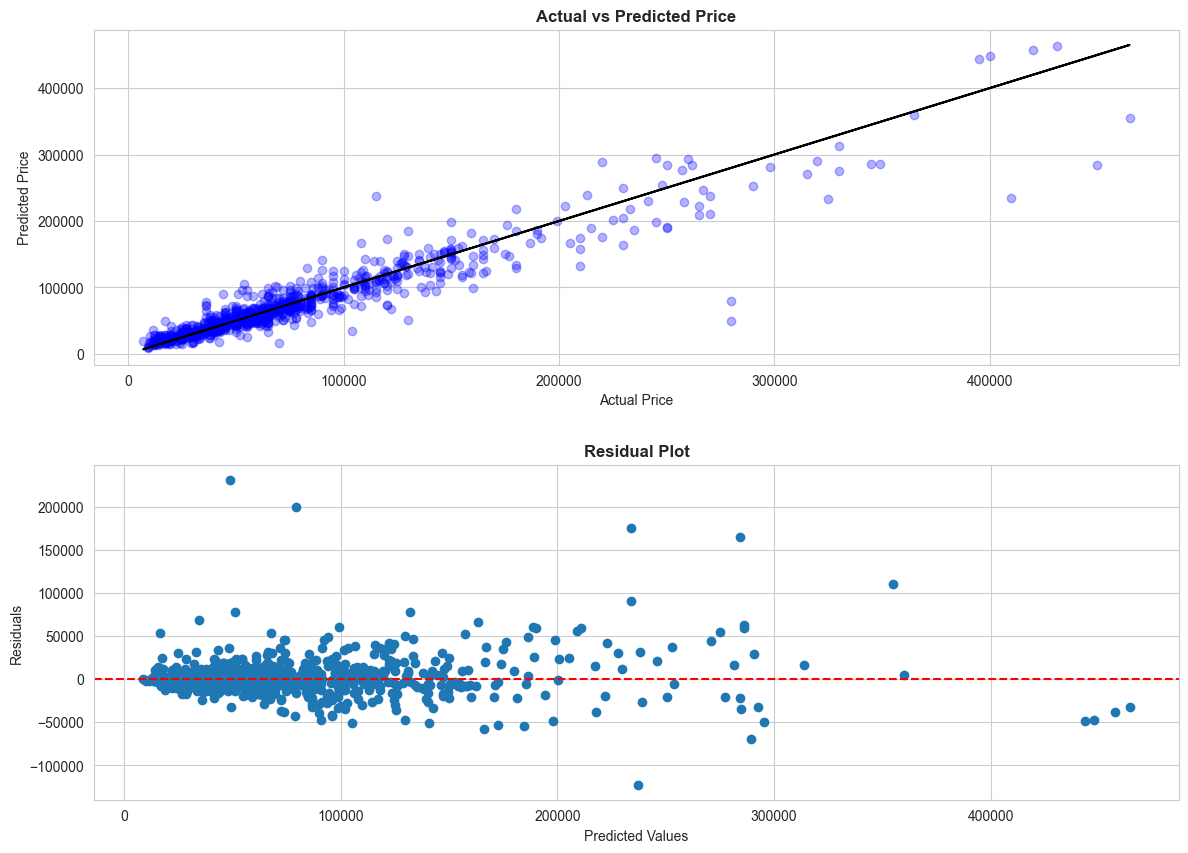

In [53]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot actual vs predicted price
ax1.scatter(y_test, y_pred_cat_boost_tuning, color='blue', alpha=0.3)
ax1.plot(y_test, y_test, color='black', alpha=1)
ax1.set_title('Actual vs Predicted Price', fontweight='bold')
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')

# Calculate residuals
residuals = y_test - y_pred_cat_boost_tuning

# Plot residual plot
ax2.scatter(y_pred_cat_boost_tuning, residuals)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show()

- By this Scatter Plot 'Actual vs Predicted Price', we can see that our model might be linear to Actual Price (from what we Predicted). But when the Price more than 150000, this plot comes more irregular. We can see that sometime we had a high-predicted price and sometime low after 150000.
- From the Scatter plot 'Residual plot' above, it can be concluded that the model is reasonably good at predicting car prices ranging from 5000 SAR to 150,000 SAR. The distribution of residual points within that price range indicates that the model has relatively low errors and is capable of producing fairly accurate predictions within that 
price range.

The presence of large errors results in a significant difference between the RMSE and MAE values. This can also be observed in the plot, where there are actual prices that are predicted much higher (overestimation) or lower (underestimation). However, the obtained MAPE value of approximately 17.4% categorizes the CatBoost model before tuning and approximately 17.9% for the CatBoost model after tuning as 'good forecaststing' for being under 20% (Lewis, 1982).

Source: Lewis, C. D. (1982). Industrial and Business Forecasting Methods: A Practical Guide to Exponential Smoothing and Curve Fitting.

In [54]:
df_compare = X_test.copy()
df_compare['predict'] = cat_boost_tuning.predict(X_test)

In [55]:
df_compare['actual price'] = y_test

In [56]:
df_compare['(%) error'] = abs(df_compare['predict'] - df_compare['actual price'])/df_compare['actual price']*100

In [57]:
sorted_df = df_compare[df_compare['(%) error'] < 20].sort_values('(%) error', ascending=False)
sorted_df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,predict,actual price,(%) error
2321,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Standard,2015,5.3,176332,96025.892394,120000,19.978423
3227,S,Riyadh,Mercedes,Automatic,Saudi,Full,2014,3.0,90000,176132.938496,220000,19.939573
5594,Sportage,Riyadh,Kia,Automatic,Saudi,Full,2016,2.4,190000,49673.306355,62000,19.881764
657,Ciocca,Riyadh,Toyota,Automatic,Saudi,Standard,2016,5.7,348000,94619.677287,79000,19.771743
2111,Elantra,Makkah,Hyundai,Automatic,Saudi,Full,2021,1.7,2600,76361.068426,95000,19.619928


In [58]:
# sns.histplot(df_compare['(%) error'])
# plt.title('Total of (%) Error')

In [59]:
# len(df_compare[df_compare['(%) error']<20])/len(df_compare)

In [60]:
max_price = y_test.max()
print(max_price)


465000


In [61]:
import pandas as pd

df_y_pred = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_cat_boost_tuning})
df_y_pred.reset_index(drop=True, inplace=True)
df_y_pred.sort_values('y_test').head(20)

list_ranges = [
    ("<10k", 0, 10000),
    ("10k-20k", 10001, 20000),
    ("20k-30k", 20001, 30000),
    ("30k-40k", 30001, 40000),
    ("40k-50k", 40001, 50000),
    ("50k-100k", 50001, 100000),
    ("100k-150k", 100001, 150000),
    ("150k-200k", 150001, 200000),
    ("200k-250k", 200001, 250000),
    ("250k-300k", 250001, 300000),
    ("300k-350k", 300001, 350000),
    ("350k-400k", 350001, 400000),
    ("400k-450k", 400001, 450000),
    (">450k (Max 500k)", 450001, float('inf')),
    ("All Range (Max 500k)", 0, float('inf'))
]

list_mae = []
list_mape = []
list_len = []

for range_name, min_value, max_value in list_ranges:
    range_df = df_y_pred[(df_y_pred['y_test'] > min_value) & (df_y_pred['y_test'] <= max_value)]
    score_mae = mean_absolute_error(range_df['y_test'], range_df['y_test_pred'])
    score_mape = mean_absolute_percentage_error(range_df['y_test'], range_df['y_test_pred'])
    len_df = len(range_df)

    list_mae.append(score_mae)
    list_mape.append(score_mape * 100)
    list_len.append(len_df)

range_metrics = pd.DataFrame({
    "Range Price (SAR)": [range_name for range_name, _, _ in list_ranges],
    "Score MAE (SAR)": list_mae,
    "Score MAPE (%)": list_mape,
    "Jumlah Data": list_len
})

range_metrics


,Range Price (SAR),Score MAE (SAR),Score MAPE (%),Jumlah Data
0,<10k,6109.297337,68.281946,8
1,10k-20k,6487.808445,43.231409,74
2,20k-30k,4862.110032,18.699207,94
3,30k-40k,6822.212223,18.735389,96
4,40k-50k,6985.932591,15.238161,106
5,50k-100k,9925.093529,14.277387,358
6,100k-150k,16876.989795,13.657734,122
7,150k-200k,22822.827530,13.666872,32
8,200k-250k,38975.591871,17.182640,22
9,250k-300k,61595.638232,22.440299,13


Based on the plot and table above, the model is only good to predict the prices of used cars above 20,000 SAR . The predictive ability is assessed based on the MAPE evaluation metric for each price range compared to the MAPE evaluation metric for the entire test dataset. MAPE is chosen as the evaluation metric because it calculates the percentage difference between the predicted and actual prices. It can be observed that the prediction performance is not good for the price range below 10,000 SAR, with a MAPE value reaching 79.14%. This is followed by the 10k - 20k SAR range with a MAPE of 40.13%. Beyond these ranges, the model is considered good as it predicts prices with MAPE values close to the MAPE of the test data. 

In [62]:
cat_boost_estimator = grid_cat.best_estimator_  # Dapatkan estimator terbaik dari GridSearchCV
cat_boost_model = cat_boost_estimator.named_steps['model']  # Akses model CatBoostRegressor

# Dapatkan pentingnya fitur
feature_importances = cat_boost_model.feature_importances_

# Buat DataFrame untuk menampilkan pentingnya fitur beserta nama fitur
feature_names = [f'Feature {i}' for i in range(len(feature_importances))]
feature_importances_df = pd.DataFrame({'Feature Name': feature_names, 'Feature Importance': feature_importances})
feature_importances_df

,Feature Name,Feature Importance
0,Feature 0,21.667616
1,Feature 1,6.521968
2,Feature 2,6.098934
3,Feature 3,0.115325
4,Feature 4,0.759142
5,Feature 5,0.006413
6,Feature 6,0.112833
7,Feature 7,0.062804
8,Feature 8,0.226124
9,Feature 9,0.046979


<Axes: title={'center': 'Feature Importances'}>

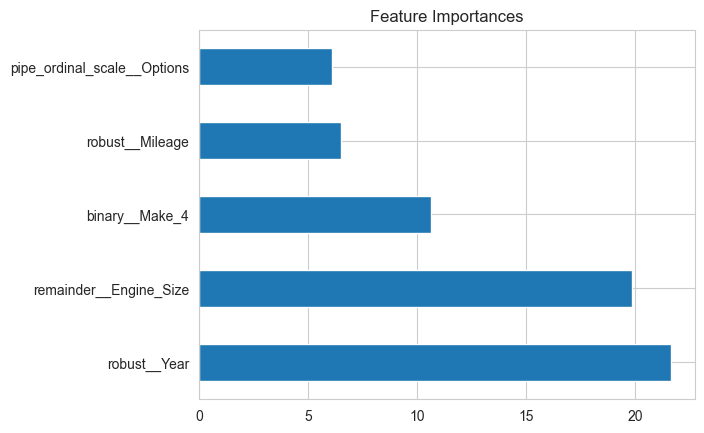

In [63]:
# Get the best estimator from GridSearchCV
best_model = grid_cat.best_estimator_

# Get the CatBoost model from the pipeline
cat_boost_model = best_model.steps[-1][1]

# Get the feature names from the corresponding transformer step in the pipeline
column_transformer_step = best_model.steps[0][1]
feature_names = column_transformer_step.get_feature_names_out()

# Get feature importances from the CatBoost model
feature_importances = cat_boost_model.feature_importances_

# Create a Series with feature importances and feature names
feature_imp = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order and select the top features
feature_imp = feature_imp.sort_values(ascending=False).head()

# Plot the feature importances
feature_imp.plot(kind='barh', title='Feature Importances')


# Conclusion

- The best model to be implemented to this dataset is Catagory Boost Regressor with the hyperparameter tuning:

    {'model__depth': 8,

    'model__iterations': 275,

    'model__l2_leaf_reg': 5,
    
    'model__learning_rate': 0.1}

- According to feature correlation to Price. The most correlated feature is Year ,and Engine_Size

- A dataset with a column of prices containing zero values cannot be used for machine learning because we only want to predict data with real numbers. However, this has the effect of making the dataset very small (only 3757 rows of data).

- This machine learning modeling is using MAPE (Mean Absolute Percentage Error) as matrix scoring because we want to understand the percentage error of predictions relative to the actual values. If it is important to measure the relative percentage error in predicting used car prices, especially in the context of comparison or performance analysis, then MAPE can be used. For example, if a company wants to assess the accuracy of a used car price prediction model for different car brands engine size or Mileage, MAPE would be a suitable metric. By calculating the percentage error, the company can compare the model's performance across different segments and identify any variations in prediction accuracy.

- The results show that after tuning the hyperparameters of the model, the MAPE slight increased from 17.41% to 17.89%, indicates that the accuracy of the model has dropped 
0.58%. This suggests that the hyperparameter tuning process was failed in improving the model's performance, and updated model can't make better predictions on new data.Therefore we will suggest using the model before tuning as a machine learning model for predicting second hand car prices.

# Recomendation

Here are some recommendations to improve the model's performance:

1. Adding a feature that categorizes cars into classic or non-classic. This is important because the prices of used cars can vary significantly based on mileage and manufacturing year, especially between classic and regular cars. By including this feature in the model, it is likely to improve the accuracy of predicting used car prices.

2. If there is significant additional data available, consider using more complex models such as recursive neural networks (RNN). However, it's important to note that if the amount of data and features is still limited to the current dataset, the potential performance improvement from using more complex models might not be substantial.

3. Since the results of the modeling before and after tuning are not significantly different, it indicates that the initial model with default parameters already performs well. Although tuning did not improve the accuracy significantly, further investigation is needed regarding other factors that can enhance the modeling results. Some factors that may need to be considered include:

- Adding more relevant features or removing features that do not contribute significantly to the prediction of used car prices.

- Conducting a deeper analysis of the data characteristics, such as identifying outliers or specific patterns that may affect the prediction results.

- Using feature engineering techniques to create new features that can enhance the model's performance.

- Evaluating and trying other machine learning models that may be more suitable for predicting used car prices.

    By conducting further exploration and investigation of these factors, it is possible to find ways to significantly improve the modeling results.

4. Since the results of the machine learning modeling using the CatBoost algorithm, with the MAPE evaluation score showing a value below 20%, specifically 17.41%, this modeling is considered as good forecasting and is suitable for implementation on the Syara.com website.

# Save Model